In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
data=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=data.load_data()
x_train=x_train/255
x_train=tf.expand_dims(x_train,axis=-1)

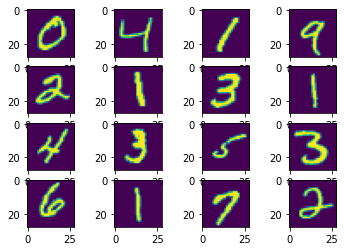

In [3]:
%matplotlib inline
plt.figure()
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(x_train[i,...])



In [4]:
input=keras.Input((28,28,1))
net=keras.layers.Conv2D(32,3,activation="relu",padding='same')(input)
net=keras.layers.BatchNormalization()(net)
# net=keras.layers.Conv2D(64,3,activation="relu",padding='same')(net)
# net=keras.layers.BatchNormalization()(net)
# net=keras.layers.Conv2D(64,3,activation="relu",padding='same')(net)
# net=keras.layers.BatchNormalization()(net)
net=keras.layers.MaxPool2D(pool_size=(2,2),padding='same')(net)
net=keras.layers.Conv2D(128,3,activation="relu",padding='same')(net)
net=keras.layers.BatchNormalization()(net)
net=keras.layers.Conv2D(128,3,activation="relu",padding='same')(net)
net=keras.layers.BatchNormalization()(net)
net=keras.layers.GlobalMaxPool2D()(net)
# net=keras.layers.Flatten()(net)
net=keras.layers.Dense(128)(net)
net=keras.layers.Dense(10)(net)
net=keras.layers.Softmax()(net)
model=keras.Model(inputs=input,outputs=net)

initial_learning_rate =0.01
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,decay_steps=500, decay_rate=0.8, staircase=True
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,loss=[keras.losses.CategoricalCrossentropy()],metrics=[keras.metrics.CategoricalCrossentropy(),keras.metrics.CategoricalAccuracy()])

In [5]:
model.fit(x_train,keras.utils.to_categorical(y_train),batch_size=256,epochs=10,verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 7s - loss: 1.8338 - categorical_crossentropy: 1.8338 - categorical_accuracy: 0.7319
Epoch 2/10
60000/60000 - 5s - loss: 0.0840 - categorical_crossentropy: 0.0840 - categorical_accuracy: 0.9738
Epoch 3/10
60000/60000 - 5s - loss: 0.0534 - categorical_crossentropy: 0.0534 - categorical_accuracy: 0.9834
Epoch 4/10
60000/60000 - 5s - loss: 0.0394 - categorical_crossentropy: 0.0394 - categorical_accuracy: 0.9879
Epoch 5/10
60000/60000 - 5s - loss: 0.0329 - categorical_crossentropy: 0.0329 - categorical_accuracy: 0.9897
Epoch 6/10
60000/60000 - 5s - loss: 0.0312 - categorical_crossentropy: 0.0312 - categorical_accuracy: 0.9903
Epoch 7/10
60000/60000 - 5s - loss: 0.0250 - categorical_crossentropy: 0.0250 - categorical_accuracy: 0.9917
Epoch 8/10
60000/60000 - 5s - loss: 0.0198 - categorical_crossentropy: 0.0198 - categorical_accuracy: 0.9939
Epoch 9/10
60000/60000 - 5s - loss: 0.0171 - categorical_crossentropy: 0.0171 - categorical_accuracy: 0.9

In [ ]:
out= model(tf.cast(x_test,float))
out=tf.argmax(out,axis=-1)

In [ ]:
plt.figure()
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(x_test[i,...])
    plt.title(out.numpy()[i])


In [ ]:
label=np.zeros([1,10],int)
label[:,2]=1
image=tf.cast(np.random.random([28,28]),float)
initial_learning_rate =0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,decay_steps=500, decay_rate=0.8, staircase=True
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
def calc_loss(img, model):
    img_batch =tf.expand_dims(img,0)
    out=model(img_batch)
    loss=out[0,1]
    return loss
def train_step(img):
    with tf.GradientTape() as tape:
        # `GradientTape` only watches `tf.Variable`s by default
        #         tape.watch(tf.constant(img))
        # This needs gradients relative to `img`
        img = tf.Variable(img)
        loss = calc_loss(img,model)

    # Calculate the gradient of the loss with respect to the pixels of the input image.
    gradients = tape.gradient(loss, img)

    # Normalize the gradients.
    gradients /= tf.math.reduce_std(gradients) + 1e-8

    # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
    # You can update the image by directly adding the gradients (because they're the same shape!)

    optimizer.apply_gradients([(-gradients, img)])  # 梯度更新
    # img = img + gradients*step_size
    # opt.apply_gradients(zip([-gradients], [img]))
    img = tf.clip_by_value(img, 0, 1)

    return loss, img
def deprocess(img):
    img = 255*img
    return tf.cast(img, tf.uint8)
def run_deep_dream_simple(img, steps=100, step_size=0.01):
    # Convert from uint8 to the range expected by the model.
    img = img
    img = tf.convert_to_tensor(img)
    step_size = tf.convert_to_tensor(step_size)

    for step in range(steps):
        loss, img = train_step(img)
        if step % 2 == 0:
            print ("Step {}, loss {}".format(step, loss))
    result = deprocess(img)
    plt.imshow(result.numpy())
    return result
dream_img = run_deep_dream_simple(img=image,
                                  steps=100, step_size=0.01)




    


In [ ]:
plt.close(1)

In [ ]:
%matplotlib inline
plt.imshow(image.numpy())

In [ ]:
print(x_train[1,...])

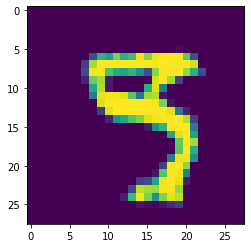

In [7]:
iamge2=generator(tf.random.normal(shape=(1, 128)))
plt.imshow(iamge2[0])

In [26]:
input=keras.Input((2,))
net=keras.layers.Dense(10)(input)
net=keras.layers.LeakyReLU(0.2)(net)
net=keras.layers.Dense(64)(net)
net=keras.layers.LeakyReLU(0.2)(net)
net=keras.layers.Dense(128)(net)
net=keras.layers.LeakyReLU(0.2)(net)
dis=keras.Model(inputs=input,outputs=net)
# train_data=np.random.random(size=(100000,1))*10
# train_data=np.concatenate([train_label,train_data],axis=-1)
# train_label=keras.utils.to_categorical(train_label)
initial_learning_rate =0.01
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,decay_steps=500, decay_rate=0.8, staircase=True
)
optimizer=keras.optimizers.Adam(lr_schedule)
loss1=keras.losses.CategoricalCrossentropy()
loss2=keras.losses.BinaryCrossentropy(from_logits=True)
metric=keras.metrics.CategoricalAccuracy()

generator=keras.models.load_model("./generator")
input=keras.Input((2,))
net=dis(input)
out =generator(net)

generator2=keras.Model(inputs=input,outputs=out)
discriminator=keras.models.load_model("./discriminator")



In [64]:
import time
def train_step():
    with tf.GradientTape() as tape:
        np.random.seed(int(time.time()))
        
        train_label=np.random.randint(10,size=(1024,1))
        train_label2=keras.utils.to_categorical(train_label)
        train_label3=np.zeros((1024,1))
        train_label3 += 0.05 * tf.random.uniform(train_label3.shape)
        train_label+=0.05 * tf.random.uniform(train_label.shape)
        train_data=np.random.random(size=(1024,1))*10
        train_data=np.concatenate([train_label,train_data],axis=-1)
        image=generator2(train_data)
        out=model(image) 
        out2=discriminator(image)
        
        loss_val1=loss1(train_label2,out)
        loss_val2=loss2(train_label3,out2)
        loss_val=2*loss_val1+8*loss_val2
    grads=tape.gradient(loss_val,dis.trainable_variables)
    optimizer.apply_gradients(zip(grads,dis.trainable_variables))
    metric.update_state(train_label2,out)
    return loss_val,image,train_data,out,out2


In [66]:

epochs = 200  # In practice you need at least 20 epochs to generate nice digits.
save_dir = "./"

for epoch in range(epochs):
    print("\nStart epoch", epoch)

    for step in range(200):
        # Train the discriminator & generator on one batch of real images.
        loss_val, generated_images,train_data,out,out2=train_step()

        # Logging.
        if step % 20 == 0:
            # Print metrics
            print(" loss at step %d: %.2f" % (step, loss_val))
            print("acc at step %d: %.2f" % (step,metric.result()))

            # Save one generated image
            img = tf.keras.preprocessing.image.array_to_img(
                generated_images[1] * 255.0, scale=False
            )
            img.save(os.path.join(save_dir, "generated2_img" + str(int(train_data[1,0])) + ".png"))
            print(str(int(train_data[1,0])),'true:',out2.numpy()[1,0])
        # To limit execution time we stop after 10 steps.
        # Remove the lines below to actually train the model!
        # if step > 10:
        #     break


Start epoch 0
 loss at step 0: 3.59
acc at step 0: 0.74
4 true: -2.3243265
 loss at step 20: 3.50
acc at step 20: 0.74
4 true: -2.3280976
 loss at step 40: 3.63
acc at step 40: 0.74
3 true: -1.7991703
 loss at step 60: 3.47
acc at step 60: 0.74
7 true: -1.5072854
 loss at step 80: 3.67
acc at step 80: 0.74
3 true: -1.8096572
 loss at step 100: 3.72
acc at step 100: 0.74
4 true: -2.3210003
 loss at step 120: 3.50
acc at step 120: 0.74
5 true: -1.7861596
 loss at step 140: 3.52
acc at step 140: 0.74
6 true: -1.5586036
 loss at step 160: 3.40
acc at step 160: 0.74
4 true: -2.144808
 loss at step 180: 3.48
acc at step 180: 0.74
8 true: -1.6531215

Start epoch 1
 loss at step 0: 3.27
acc at step 0: 0.74
1 true: -2.2871482
 loss at step 20: 3.55
acc at step 20: 0.74
7 true: -1.5105239
 loss at step 40: 3.55
acc at step 40: 0.75
1 true: -2.2890942


KeyboardInterrupt: 

[[1.0395772e-05 2.1892838e-07 3.1150957e-08 3.3018459e-08 9.4641587e-03
  9.8854303e-01 8.2444353e-07 3.8911694e-05 1.9052055e-03 3.7238242e-05]]


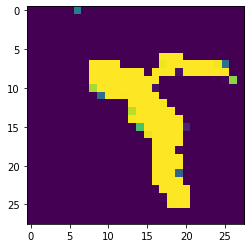

In [59]:
%matplotlib inline
data=np.array([[8,100]])
iamge=generator2(data)
out=model(iamge)
print(out.numpy())
plt.imshow(iamge[0])